In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
import random
from sklearn.preprocessing import normalize
import scipy.stats as stats

In [2]:
df = pd.read_csv("weather_ww2.csv")
df2 = df.drop("MaxTemp", 1)

## What does our prediction variable look like?

In [5]:
df['MaxTemp'].describe()

count    118542.000000
mean         27.224570
std           8.261308
min         -33.333333
25%          25.555556
50%          29.444444
75%          31.666667
max          50.000000
Name: MaxTemp, dtype: float64

## How are the relationships to the prediction variable?

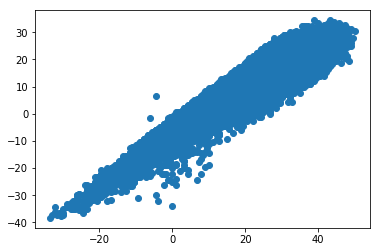

In [6]:
plt.scatter(df["MaxTemp"],df["MinTemp"])

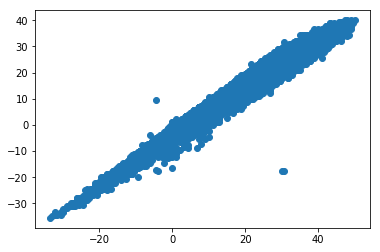

In [35]:
plt.scatter(df["MaxTemp"],df["MeanTemp"])

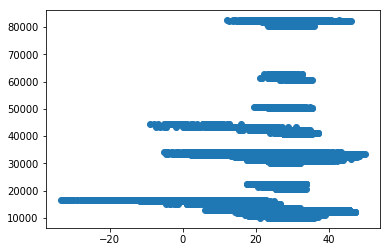

In [36]:
plt.scatter(df["MaxTemp"],df["STA"])

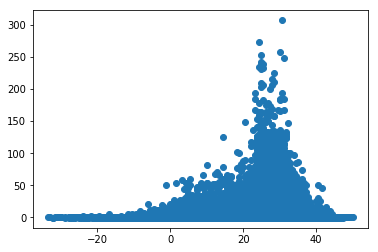

In [37]:
plt.scatter(df["MaxTemp"],df["Precip"])

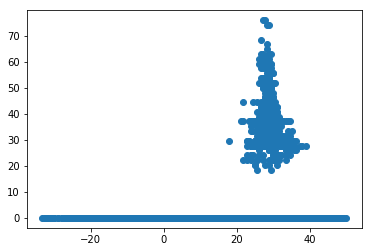

In [38]:
plt.scatter(df["MaxTemp"],df["WindGustSpd"])

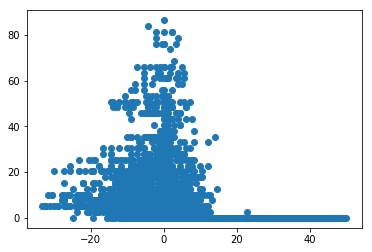

In [39]:
plt.scatter(df["MaxTemp"],df["Snowfall"])

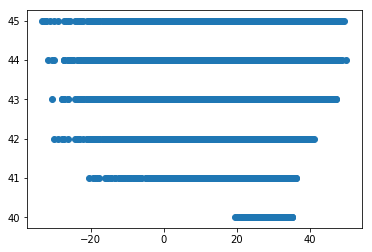

In [40]:
plt.scatter(df["MaxTemp"],df["YR"])

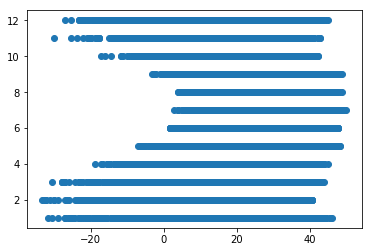

In [41]:
plt.scatter(df["MaxTemp"],df["MO"])

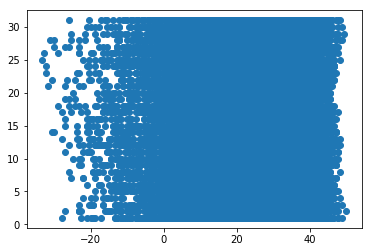

In [42]:
plt.scatter(df["MaxTemp"],df["DA"])

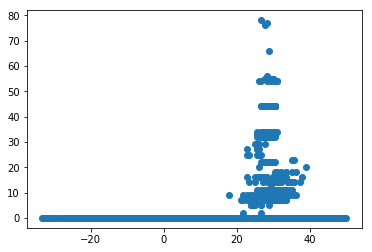

In [43]:
plt.scatter(df["MaxTemp"],df["DR"])

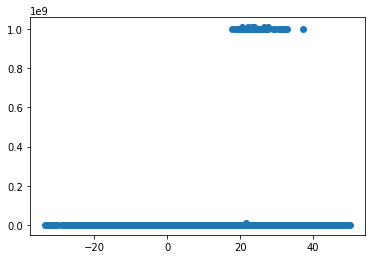

In [44]:
plt.scatter(df["MaxTemp"],df["TSHDSBRSGF"])

## Our models

0.9936820259431154


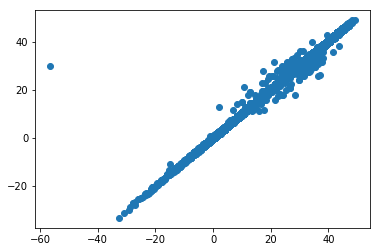

In [3]:
#the first model that jumps out at me is linear regression since this is a regression problem. 

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
#
x = df2[["STA", "Precip", "WindGustSpd", "Snowfall", "YR", "MO", "DA",
         "DR", "TSHDSBRSGF", "MinTemp", "MeanTemp"]]


y = df["MaxTemp"]


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.33)

#fit model
regr.fit(X_train,Y_train)

#predict x
pred = regr.predict(X_test)

#how much variance are we explaining?
print(regr.score(X_test,Y_test))  

#which features should we keep?
#print(regr.)

#what type of errors are we getting? 
print(plt.scatter(pred,Y_test))


In [95]:
#what's the mse?
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(pred, Y_test)
print(mse)

60.134006217824336


In [97]:
#let's check for overfitting
from sklearn.model_selection import cross_val_score

cross_val_score(regr, X_test, Y_test, cv=10)

array([0.09002136, 0.11987319, 0.12036616, 0.09478643, 0.1288223 ,
       0.09219823, 0.12787949, 0.07367447, 0.13617525, 0.11477389])

[5.84118688e-01 1.02218510e-02 1.24472835e-05 3.02309017e-01
 1.56679912e-03 9.69585402e-02 2.51491971e-03 5.64886903e-06
 2.29208861e-03]
0.8842466523761771


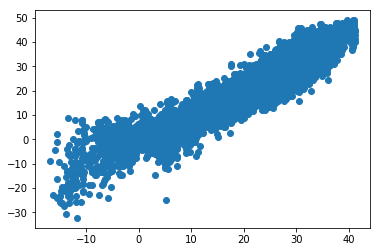

In [98]:
params = {'n_estimators': 100,
          'subsample' : .7,
          'max_depth' : 5
          
          }
regr2 = ensemble.GradientBoostingRegressor(** params)
regr2.fit(X_train, Y_train)
pred2 = regr2.predict(X_test)
print(regr2.feature_importances_)

print(regr2.score(X_test, Y_test))
print(plt.scatter(pred2,Y_test))

In [99]:
#let's check for overfitting
from sklearn.model_selection import cross_val_score

cross_val_score(regr2, X_test, Y_test, cv=10)

array([0.88133208, 0.89435509, 0.88153318, 0.87998662, 0.88339372,
       0.87979092, 0.88372637, 0.88031903, 0.89118515, 0.88741402])

In [100]:
#what's the mse?
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(pred2, Y_test)
print(mse)

7.80130892463455


0.9647249783567741


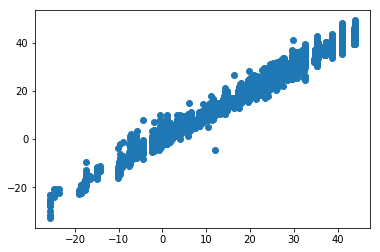

In [91]:
params = {'n_estimators': 100,
          'max_depth': 5
          }
rf = ensemble.RandomForestRegressor(** params)

rf.fit(X_train, Y_train)
pred3 = rf.predict(X_test)

print(rf.score(X_test, Y_test))
print(plt.scatter(pred3,Y_test))

In [92]:
#let's check for overfitting
from sklearn.model_selection import cross_val_score

cross_val_score(rf, X_test, Y_test, cv=10)

array([0.96997161, 0.96150809, 0.96983255, 0.96537861, 0.97047488,
       0.96569044, 0.9673073 , 0.96835167, 0.96729521, 0.96491208])

In [93]:
#what's the mse?
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(pred3, Y_test)
print(mse)

2.4072424510520163


In [ ]:
from sklearn.svm import SVR
svr = SVR()
fit_svr = svr.fit(X_train, Y_train)

pred_svr = fit_svr.predict(X_test)

print('\n Accuracy by admission status')
#print(pd.crosstab(predict_test, Y_test))

print('\n Percentage accuracy')
print(svr.score(X_test, Y_test))


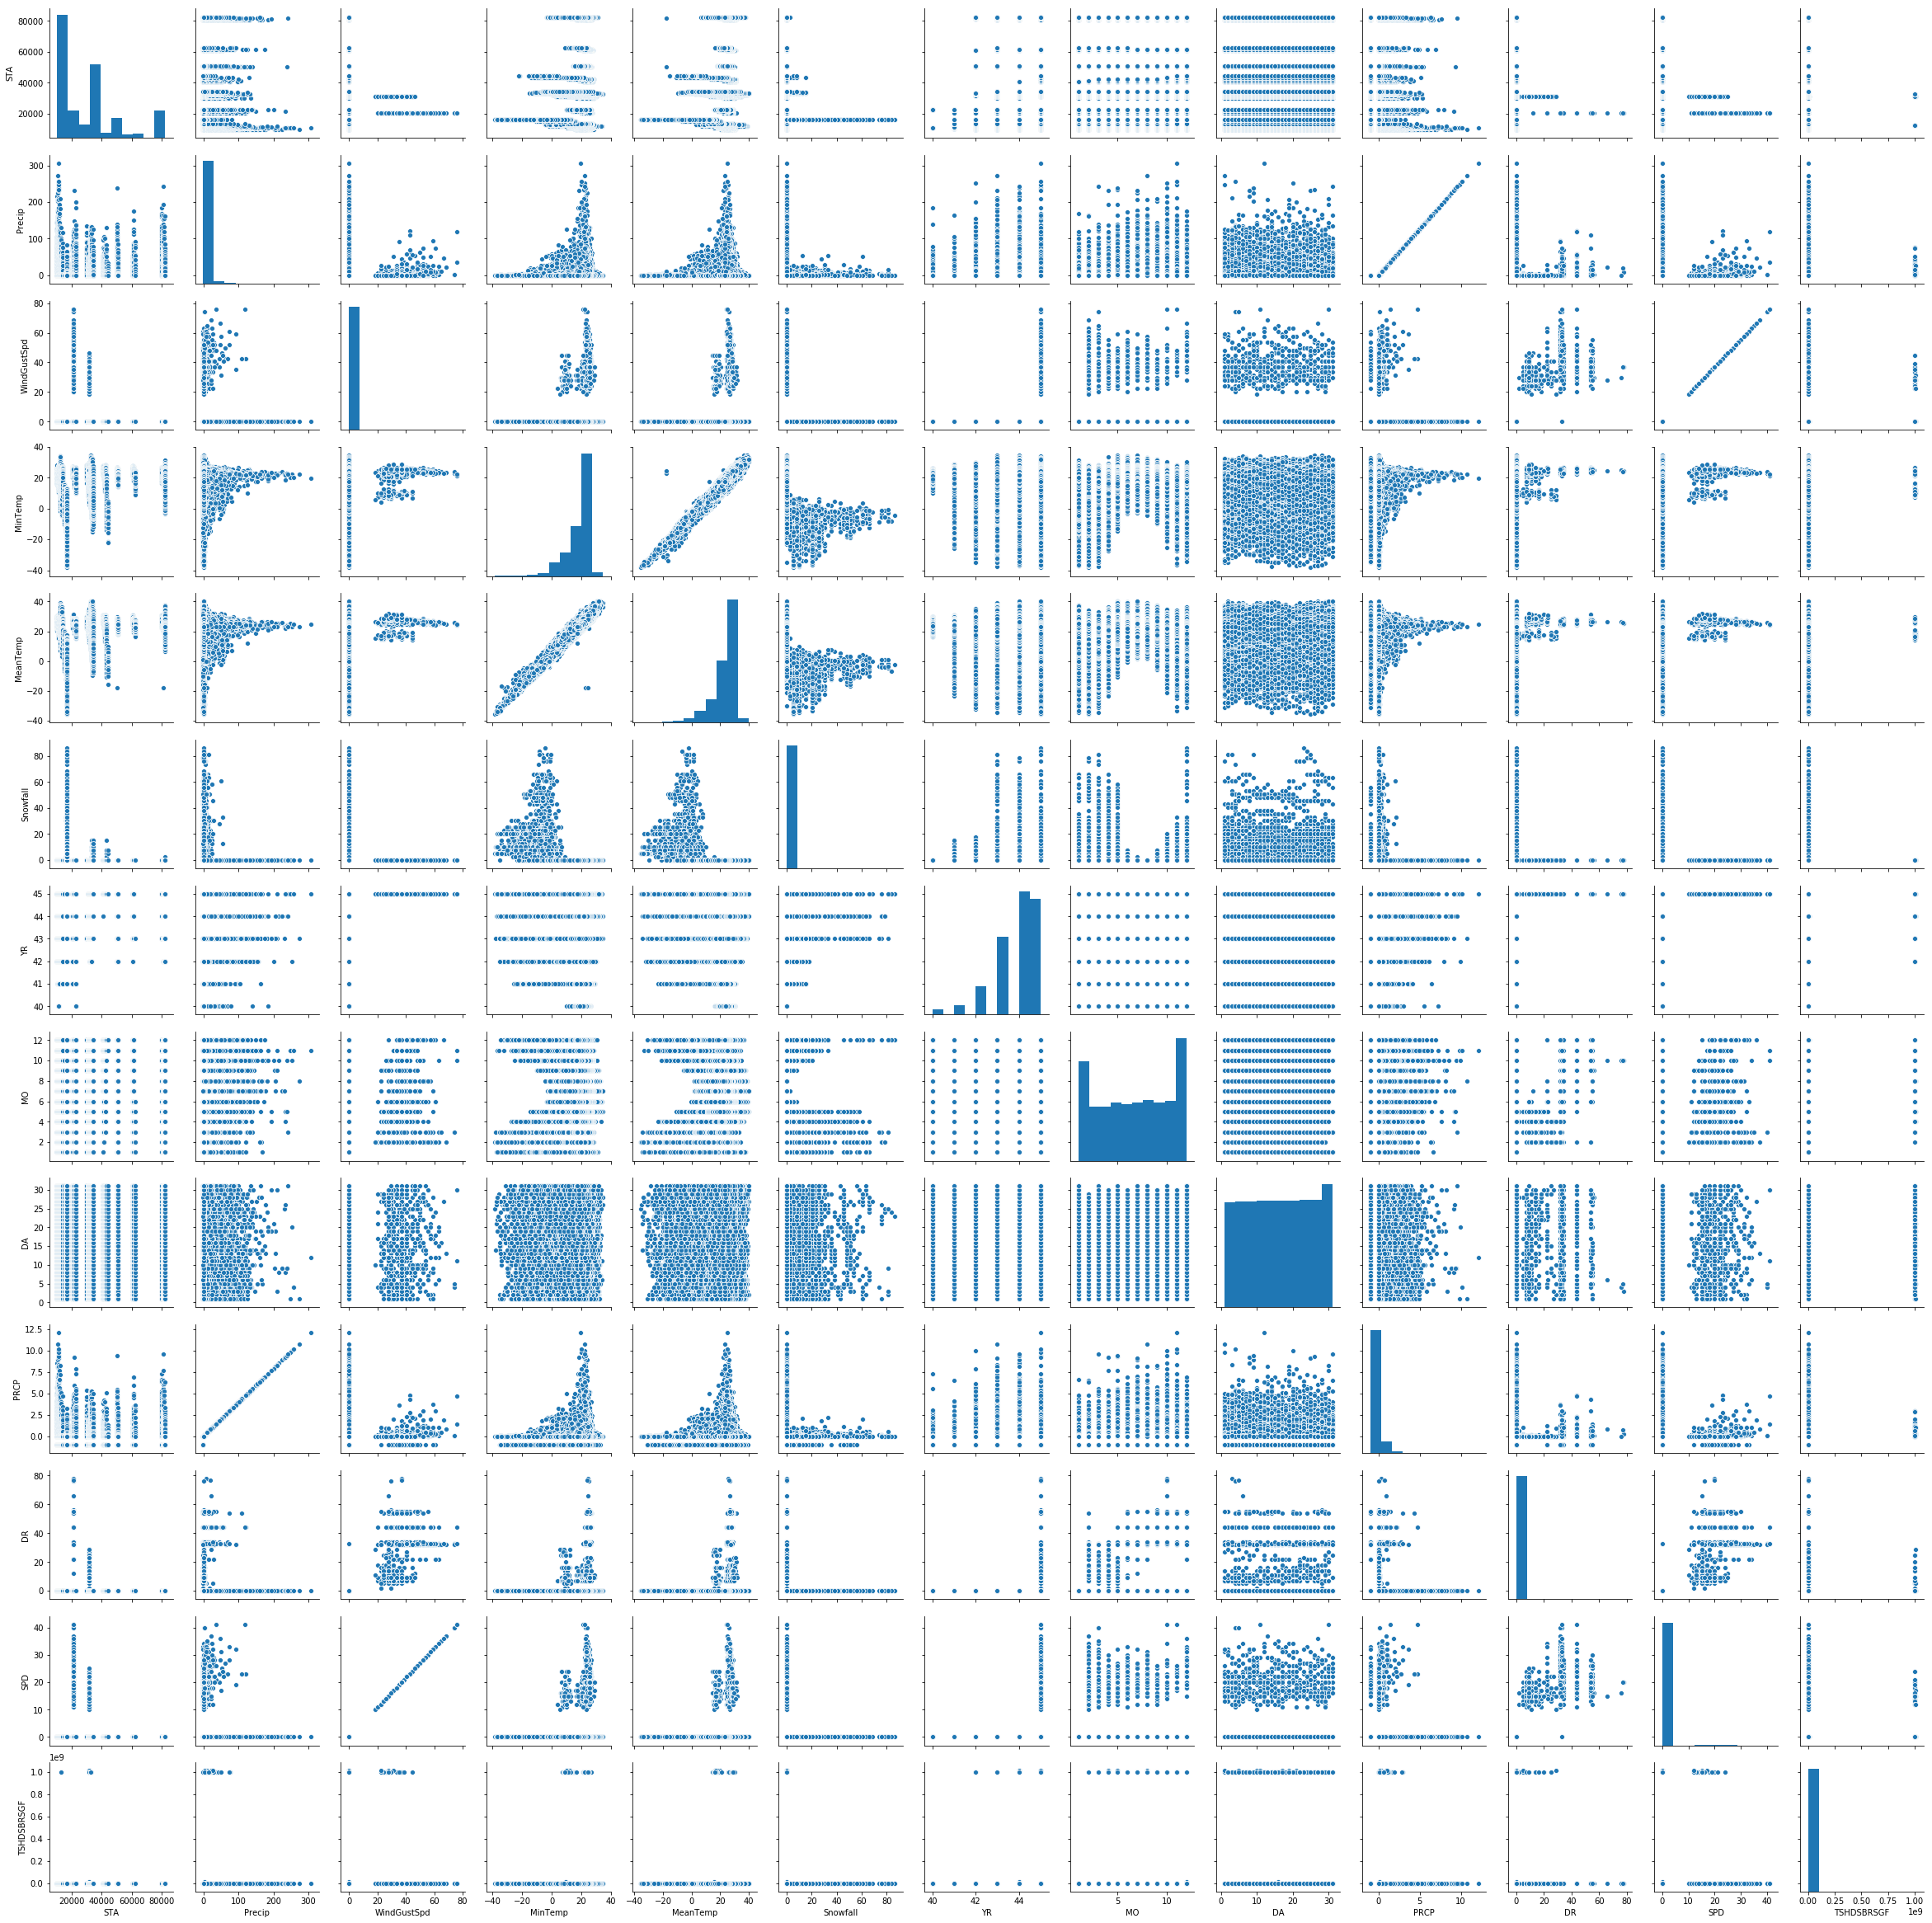

In [7]:
sns.pairplot(x)

In [9]:
#let's look at our variables
def quick_analysis(df):
 print("Data Types:")
 print(df.dtypes)
 print("Rows and Columns:")
 print(df.shape)
 print("Column Names:")
 print(df.columns)
 print("Null Values:")
 print(df.apply(lambda x: sum(x.isnull()) / len(df)))
quick_analysis(x)

Data Types:
STA              int64
Precip         float64
WindGustSpd    float64
MinTemp        float64
MeanTemp       float64
Snowfall       float64
YR               int64
MO               int64
DA               int64
PRCP           float64
DR               int64
SPD              int64
TSHDSBRSGF       int64
dtype: object
Rows and Columns:
(118542, 13)
Column Names:
Index(['STA', 'Precip', 'WindGustSpd', 'MinTemp', 'MeanTemp', 'Snowfall', 'YR',
       'MO', 'DA', 'PRCP', 'DR', 'SPD', 'TSHDSBRSGF'],
      dtype='object')
Null Values:
STA            0.0
Precip         0.0
WindGustSpd    0.0
MinTemp        0.0
MeanTemp       0.0
Snowfall       0.0
YR             0.0
MO             0.0
DA             0.0
PRCP           0.0
DR             0.0
SPD            0.0
TSHDSBRSGF     0.0
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x053E8170>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x162F28B0>]], dtype=object)

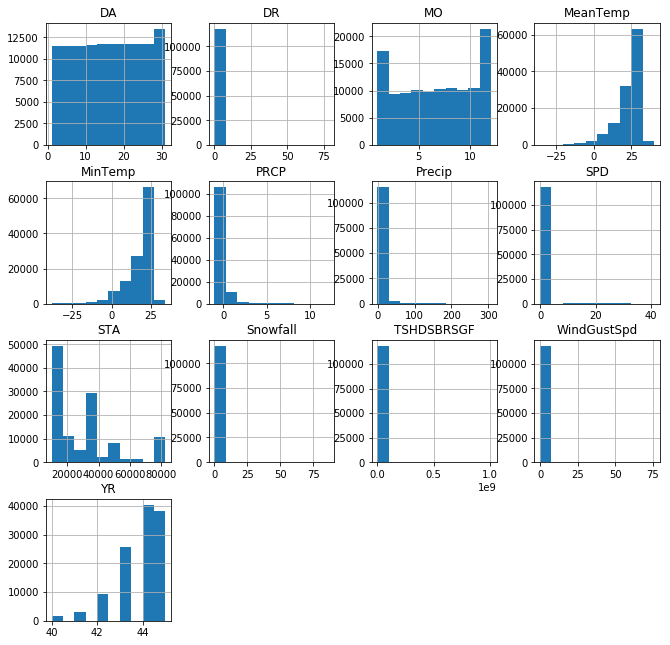

In [11]:
x[x.dtypes[(x.dtypes=="float64")|(x.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [8]:
#This is without the weather data, it seems like it's having a really hard time 
# Import the model.
from sklearn.neural_network import MLPRegressor

# Establish and fit the model - 100,2 
mlp = MLPRegressor(hidden_layer_sizes=(100,2), alpha=.02)
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
mlp.score(X_test, Y_test)

-76.73864218743824

In [19]:
#Still not doing well, but looks slightly better. 
# Import the model.
from sklearn.neural_network import MLPRegressor

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPRegressor(hidden_layer_sizes=(100,2), alpha=.2)
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.2, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
mlp.score(X_test, Y_test)

-2.004149537215838e-06

In [21]:
#Still not doing well, but looks slightly better. 

# Establish and fit the mode
absl perceptron layer.
mlp = MLPRegressor(hidden_layer_sizes=(100,4,2), alpha=.2)
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.2, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [22]:
mlp.score(X_test, Y_test)

-8.236278556937286

In [6]:
#Still not doing well, but looks slightly better. 

# Establish and fit the model - 1000,4,2 perceptron layer.
mlp = MLPRegressor(hidden_layer_sizes=(1000,4,2), alpha=.02)
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [7]:
mlp.score(X_test, Y_test)

-8.697975495408627e-08